In [1]:
# Core libraries for file handling + data analysis
import os
import glob
import pandas as pd
import numpy as np

# Plotting library
import matplotlib.pyplot as plt


In [2]:
# ----------------------------
# STEP 1: Load all participant CSV files automatically
# ----------------------------

DATA_FOLDER = "data"   # your folder name (inside extracted zip)
OUTPUT_FOLDER = "outputs"

# Create outputs folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER, exist_ok=True)     

# glob finds all CSV files in the folder
csv_files = glob.glob(os.path.join(DATA_FOLDER, "*.csv"))

print("Number of participant files found:", len(csv_files))
print("Example file:", csv_files[0])


Number of participant files found: 11
Example file: data\aliya_SST2_2026-01-18_18h53.27.344.csv


In [3]:
# ----------------------------
# STEP 2: Read all files and merge into one dataset
# ----------------------------

df_list = [] 

for file in csv_files:
    temp = pd.read_csv(file) #temporary
    
    # If participant column is missing in some files, we can extract from filename
    
    temp["source_file"] = os.path.basename(file)  
    df_list.append(temp) #append means store

raw = pd.concat(df_list, ignore_index=True) 

print("Total rows loaded:", raw.shape[0])
print("Total columns:", raw.shape[1])

raw.head()


Total rows loaded: 3284
Total columns: 115


,text,thisN,thisTrialN,thisRepN,key_resp_inst.keys,key_resp_inst.rt,key_resp_inst.duration,go_image,stop_image,corr_resp,...,date,expName,psychopyVersion,frameRate,expStart,Unnamed: 110,source_file,Unnamed: 109,fb_text.stopped,Unnamed: 111
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2026-01-18_18h53.27.344,SST2,2024.2.4,60.030423,2026-01-18 18h54.02.366846 +0530,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv,NaN,NaN,NaN
1,Your main task is to respond to white arrows (...,0.0,0.0,0.0,space,0.431674,NaN,NaN,NaN,NaN,...,2026-01-18_18h53.27.344,SST2,2024.2.4,60.030423,2026-01-18 18h54.02.366846 +0530,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv,NaN,NaN,NaN
2,"However, on some trials (stop-signal trials) t...",1.0,1.0,0.0,space,0.371376,NaN,NaN,NaN,NaN,...,2026-01-18_18h53.27.344,SST2,2024.2.4,60.030423,2026-01-18 18h54.02.366846 +0530,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv,NaN,NaN,NaN
3,"Nevertheless, it is really important that you ...",2.0,2.0,0.0,space,0.251598,NaN,NaN,NaN,NaN,...,2026-01-18_18h53.27.344,SST2,2024.2.4,60.030423,2026-01-18 18h54.02.366846 +0530,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv,NaN,NaN,NaN
4,"However, at the end of each experimental block...",3.0,3.0,0.0,space,0.247612,NaN,NaN,NaN,NaN,...,2026-01-18_18h53.27.344,SST2,2024.2.4,60.030423,2026-01-18 18h54.02.366846 +0530,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv,NaN,NaN,NaN


In [4]:
# ----------------------------
# STEP 3: Keep only important columns for analysis
# ----------------------------

cols_needed = ["participant", "is_stop", "key_resp.rt", "key_resp.corr", "SSD", "source_file"]

data = raw[cols_needed].copy()

data.head()


,participant,is_stop,key_resp.rt,key_resp.corr,SSD,source_file
0,aliya,NaN,NaN,NaN,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv
1,aliya,NaN,NaN,NaN,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv
2,aliya,NaN,NaN,NaN,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv
3,aliya,NaN,NaN,NaN,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv
4,aliya,NaN,NaN,NaN,NaN,aliya_SST2_2026-01-18_18h53.27.344.csv


In [5]:
# ----------------------------
# STEP 4: Drop rows that are not real trials
# ----------------------------

# Keep only rows where is_stop exists
data = data.dropna(subset=["is_stop"])

# Convert key columns to numeric
# errors='coerce' converts any non-numeric weird entries into NaN
data["is_stop"] = pd.to_numeric(data["is_stop"], errors="coerce")
data["key_resp.rt"] = pd.to_numeric(data["key_resp.rt"], errors="coerce")
data["key_resp.corr"] = pd.to_numeric(data["key_resp.corr"], errors="coerce")
data["SSD"] = pd.to_numeric(data["SSD"], errors="coerce")

print("Rows after keeping real trials:", len(data))
data.head()


Rows after keeping real trials: 3168


,participant,is_stop,key_resp.rt,key_resp.corr,SSD,source_file
5,aliya,0.0,0.887681,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
6,aliya,0.0,0.350880,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
7,aliya,0.0,0.382165,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
8,aliya,0.0,0.426512,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
9,aliya,0.0,0.414961,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv


In [6]:
# ----------------------------
# STEP 5: Define cleaning rules
# ----------------------------

MIN_RT = 0.2    # 200 ms
MAX_RT = 1.25   # 1250 ms

print("RT cleaning window:", MIN_RT, "to", MAX_RT, "seconds")


RT cleaning window: 0.2 to 1.25 seconds


In [7]:
# ----------------------------
# STEP 6: Separate Go and Stop trials
# ----------------------------

go = data[data["is_stop"] == 0].copy()
stop = data[data["is_stop"] == 1].copy()

print("Go trials:", len(go))
print("Stop trials:", len(stop))


Go trials: 2376
Stop trials: 792


In [8]:
# ----------------------------
# STEP 7: Clean Go trials 
# keep ONLY correct go trials for Go RT distribution
# ----------------------------

go_clean = go[
    (go["key_resp.corr"] == 1) &               # only correct go responses
    (go["key_resp.rt"].notna()) &              # RT should not be missing
    (go["key_resp.rt"] >= MIN_RT) &
    (go["key_resp.rt"] <= MAX_RT)
].copy()

print("Go trials after cleaning:", len(go_clean))
go_clean.head()


Go trials after cleaning: 2296


,participant,is_stop,key_resp.rt,key_resp.corr,SSD,source_file
5,aliya,0.0,0.887681,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
6,aliya,0.0,0.350880,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
7,aliya,0.0,0.382165,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
8,aliya,0.0,0.426512,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv
9,aliya,0.0,0.414961,1.0,0.2,aliya_SST2_2026-01-18_18h53.27.344.csv


In [9]:
# ----------------------------
# STEP 8: Participant summary (Go accuracy, mean Go RT, stop success)
# ----------------------------

summary = []

for pid in data["participant"].unique():
    sub = data[data["participant"] == pid]
    
    go_sub = sub[sub["is_stop"] == 0]
    stop_sub = sub[sub["is_stop"] == 1]

    # Go accuracy (out of all go trials)
    go_acc = go_sub["key_resp.corr"].mean()

    # Mean Go RT (from CLEAN correct Go trials only)
    go_rt_mean = go_clean[go_clean["participant"] == pid]["key_resp.rt"].mean()

    # Stop success rate: correct=1 means successfully inhibited
    stop_success = stop_sub["key_resp.corr"].mean()

    # Mean SSD (only stop trials)
    mean_ssd = stop_sub["SSD"].mean()

    summary.append({
        "participant": pid,
        "n_go_trials": len(go_sub),
        "n_stop_trials": len(stop_sub),
        "go_accuracy": go_acc,
        "mean_go_rt_sec": go_rt_mean,
        "stop_success_rate": stop_success,
        "mean_ssd_sec": mean_ssd
    })

summary_df = pd.DataFrame(summary)
summary_df


,participant,n_go_trials,n_stop_trials,go_accuracy,mean_go_rt_sec,stop_success_rate,mean_ssd_sec
0,aliya,216,72,0.958333,0.590179,0.513889,0.340278
1,hira,216,72,0.972222,0.421427,0.500000,0.211111
2,lira,216,72,0.902778,0.389417,0.430556,0.180556
3,musarrat,216,72,0.981481,0.552303,0.513889,0.308333
4,nazia,216,72,0.976852,0.441847,0.486111,0.227778
5,rahema,216,72,0.986111,0.446067,0.500000,0.191667
6,razi,216,72,0.981481,0.410736,0.486111,0.165972
7,sira,216,72,0.972222,0.412497,0.500000,0.186111
8,zaid,216,72,1.000000,0.409902,0.500000,0.181944
9,zain,216,72,0.962963,0.437241,0.513889,0.202778


In [10]:
# ----------------------------
# STEP 9: SSRT (Integration Method)
# ----------------------------

def compute_ssrt_integration(go_rts, mean_ssd, p_respond_stop):
    """
    go_rts: numpy array of cleaned go RTs (correct only)
    mean_ssd: mean SSD (seconds)
    p_respond_stop: probability of responding on stop trials (failed stop rate)
    """

    # If participant has no go RTs or missing SSD, SSRT cannot be computed
    if len(go_rts) == 0 or np.isnan(mean_ssd) or np.isnan(p_respond_stop):
        return np.nan

    # Guardrail: p must stay between 0 and 1
    p = min(max(p_respond_stop, 0), 1)

    # Find percentile Go RT
    nth_rt = np.percentile(go_rts, p * 100)

    # Integration SSRT formula
    ssrt = nth_rt - mean_ssd
    return ssrt


ssrt_list = []

for pid in summary_df["participant"]:
    # Get go RT distribution for this participant (correct & cleaned)
    go_rts = go_clean[go_clean["participant"] == pid]["key_resp.rt"].dropna().values

    # p(respond|stop) = failed stop rate
    stop_success = summary_df.loc[summary_df["participant"] == pid, "stop_success_rate"].values[0]
    p_respond_stop = 1 - stop_success

    mean_ssd = summary_df.loc[summary_df["participant"] == pid, "mean_ssd_sec"].values[0]

    ssrt = compute_ssrt_integration(go_rts, mean_ssd, p_respond_stop)

    ssrt_list.append(ssrt)

summary_df["SSRT_sec"] = ssrt_list
summary_df["SSRT_ms"] = summary_df["SSRT_sec"] * 1000  # convert to ms

summary_df


,participant,n_go_trials,n_stop_trials,go_accuracy,mean_go_rt_sec,stop_success_rate,mean_ssd_sec,SSRT_sec,SSRT_ms
0,aliya,216,72,0.958333,0.590179,0.513889,0.340278,0.226505,226.505244
1,hira,216,72,0.972222,0.421427,0.500000,0.211111,0.194404,194.404139
2,lira,216,72,0.902778,0.389417,0.430556,0.180556,0.203102,203.102325
3,musarrat,216,72,0.981481,0.552303,0.513889,0.308333,0.217454,217.454254
4,nazia,216,72,0.976852,0.441847,0.486111,0.227778,0.192085,192.085163
5,rahema,216,72,0.986111,0.446067,0.500000,0.191667,0.213374,213.373533
6,razi,216,72,0.981481,0.410736,0.486111,0.165972,0.228528,228.528243
7,sira,216,72,0.972222,0.412497,0.500000,0.186111,0.213017,213.017489
8,zaid,216,72,1.000000,0.409902,0.500000,0.181944,0.218535,218.534706
9,zain,216,72,0.962963,0.437241,0.513889,0.202778,0.205093,205.093022


In [11]:
# ----------------------------
# STEP 10: Save cleaned outputs
# ----------------------------

summary_path = os.path.join(OUTPUT_FOLDER, "participant_summary_with_SSRT.csv")
summary_df.to_csv(summary_path, index=False)

go_clean_path = os.path.join(OUTPUT_FOLDER, "go_clean_trials.csv")
go_clean.to_csv(go_clean_path, index=False)

print("Saved summary to:", summary_path)
print("Saved cleaned go trials to:", go_clean_path)


Saved summary to: outputs\participant_summary_with_SSRT.csv
Saved cleaned go trials to: outputs\go_clean_trials.csv


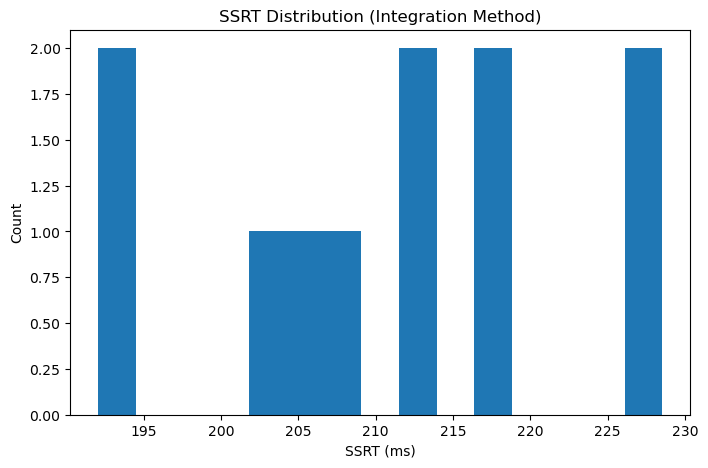

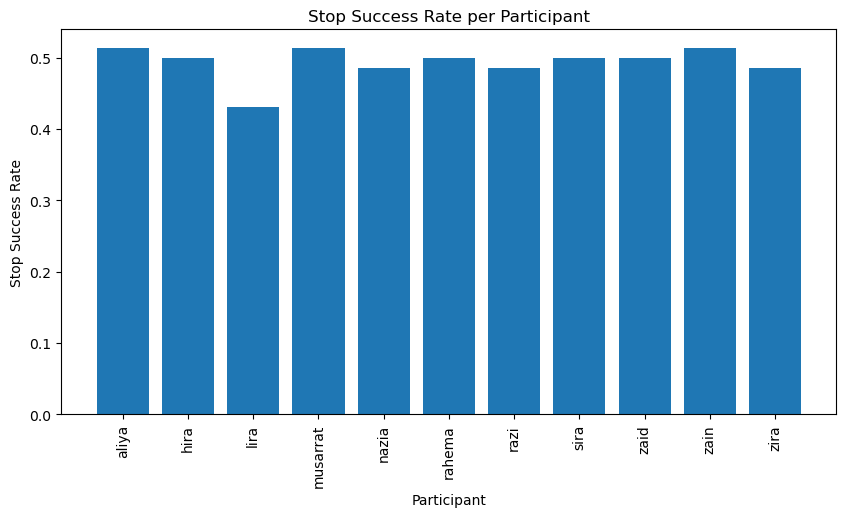

In [12]:
# ----------------------------
# STEP 11: Plots
# ----------------------------

# Plot SSRT distribution
plt.figure(figsize=(8,5))
plt.hist(summary_df["SSRT_ms"].dropna(), bins=15)
plt.title("SSRT Distribution (Integration Method)")
plt.xlabel("SSRT (ms)")
plt.ylabel("Count")
plt.show()

# Stop success per participant
plt.figure(figsize=(10,5))
plt.bar(summary_df["participant"], summary_df["stop_success_rate"])
plt.title("Stop Success Rate per Participant")
plt.xlabel("Participant")
plt.ylabel("Stop Success Rate")
plt.xticks(rotation=90)
plt.show()


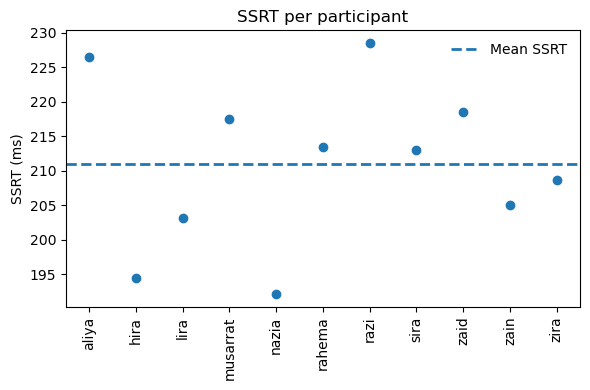

In [14]:
plt.figure(figsize=(6,4))
plt.plot(summary_df["participant"], summary_df["SSRT_ms"], marker="o", linestyle="none")
plt.axhline(summary_df["SSRT_ms"].mean(), linestyle="--", linewidth=2, label="Mean SSRT")
plt.xticks(rotation=90)
plt.title("SSRT per participant")
plt.ylabel("SSRT (ms)")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()
